#  The Sparks Foundation | @ GRIPNovember 2022

TASK 4 - Exploratory Data Analysis - Terrorism (Global Terrorism)

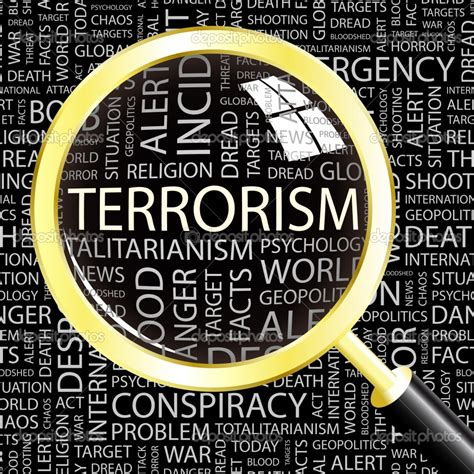

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()
os.chdir("D:\\SPARKS PROJECTS") # change directory

In [3]:
df = pd.read_csv(r'globalterrorismdb_0718dist.csv', encoding_errors = 'replace')

In [81]:
df.head()

Year  Month  day             Country    State                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            City   latitude   longitude                      Attacktype  kill  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   1.0   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   0.0   
2        Unknown  15.478598  120.599741                   Assassination   1.0   
3         Athens  37.997490   23.762728               Bombing/Explosion   0.0   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   0.0   

   Wound                  target1 summary                               Group  \
0    0.0             Julio Guzman     NaN                              MANO-D   
1    0.0  Nadine Chaval, daughter     NaN  23rd of September Communist League   
2    0.0                 Employee     NaN                             Unknown   
3    0.0             U.S. Embassy     NaN                             Unknown   
4    0.0           U.S. Consulate     NaN                             Unknown   

                    Targettype      Weapon motive           WeaponSubType  
0  Private Citizens & Property     Unknown    NaN                     NaN  
1      Government (Diplomatic)     Unknown    NaN                     NaN  
2          Journalists & Media     Unknown    NaN                     NaN  
3      Government (Diplomatic)  Explosives    NaN  Unknown Explosive Type  
4      Government (Diplomatic)  Incendiary    NaN                     NaN

In [5]:
df.tail()

eventid  iyear  imonth  iday approxdate  extended resolution  \
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country  country_txt  region  ... addnotes  \
181686      182      Somalia      11  ...      NaN   
181687      200        Syria      10  ...      NaN   
181688      160  Philippines       5  ...      NaN   
181689       92        India       6  ...      NaN   
181690      160  Philippines       5  ...      NaN   

                                                   scite1  \
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
181686  START Primary Collection        0         0        0       0      NaN  
181687  START Primary Collection       -9        -9        1       1      NaN  
181688  START Primary Collection        0         0        0       0      NaN  
181689  START Primary Collection       -9        -9        0      -9      NaN  
181690  START Primary Collection       -9        -9        0      -9      NaN  

[5 rows x 135 columns]

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

In [7]:
df.shape

(181691, 135)

In [8]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [9]:
df.isnull().any()

eventid       False
iyear         False
imonth        False
iday          False
approxdate     True
              ...  
INT_LOG       False
INT_IDEO      False
INT_MISC      False
INT_ANY       False
related        True
Length: 135, dtype: bool

In [10]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [11]:
df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

In [12]:
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

Eliminating null and renaming columns

In [60]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City',
                           'latitude':'latitude','longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype',
                           'weaptype1_txt':'Weapon','nkill':'kill','nwound':'Wound','weapsubtype1_txt':'WeaponSubType'},inplace=True) 
#inplace allows us to save the value there i.e. updates the dataframe with required modification

In [61]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill','Wound','target1','summary',
                         'Group','Targettype','Weapon','motive','WeaponSubType']]

In [15]:
df.head()

Year  Month  day             Country    State                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            City   latitude   longitude                      Attacktype  kill  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   1.0   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   0.0   
2        Unknown  15.478598  120.599741                   Assassination   1.0   
3         Athens  37.997490   23.762728               Bombing/Explosion   NaN   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   NaN   

   Wound                  target1 summary                               Group  \
0    0.0             Julio Guzman     NaN                              MANO-D   
1    0.0  Nadine Chaval, daughter     NaN  23rd of September Communist League   
2    0.0                 Employee     NaN                             Unknown   
3    NaN             U.S. Embassy     NaN                             Unknown   
4    NaN           U.S. Consulate     NaN                             Unknown   

                    Targettype      Weapon motive           WeaponSubType  
0  Private Citizens & Property     Unknown    NaN                     NaN  
1      Government (Diplomatic)     Unknown    NaN                     NaN  
2          Journalists & Media     Unknown    NaN                     NaN  
3      Government (Diplomatic)  Explosives    NaN  Unknown Explosive Type  
4      Government (Diplomatic)  Incendiary    NaN                     NaN

In [16]:
df.shape

(181691, 19)

In [17]:
df.isna().sum()

Year                  0
Month                 0
day                   0
Country               0
State               421
Region                0
City                434
latitude           4556
longitude          4557
Attacktype            0
kill              10313
Wound             16311
target1             636
summary           66129
Group                 0
Targettype            0
Weapon                0
motive           131130
WeaponSubType     20768
dtype: int64

In [18]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)

In [19]:
df['Casualities'] = df['kill'] + df['Wound']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   State          181270 non-null  object 
 5   Region         181691 non-null  object 
 6   City           181257 non-null  object 
 7   latitude       177135 non-null  float64
 8   longitude      177134 non-null  float64
 9   Attacktype     181691 non-null  object 
 10  kill           181691 non-null  float64
 11  Wound          181691 non-null  float64
 12  target1        181055 non-null  object 
 13  summary        115562 non-null  object 
 14  Group          181691 non-null  object 
 15  Targettype     181691 non-null  object 
 16  Weapon         181691 non-null  object 
 17  motive         50561 non-null

In [21]:
df.shape

(181691, 20)

Finding numeric columns for visualization

In [22]:
df.select_dtypes('number')

Year  Month  day   latitude   longitude  kill  Wound  Casualities
0       1970      7    2  18.456792  -69.951164   1.0    0.0          1.0
1       1970      0    0  19.371887  -99.086624   0.0    0.0          0.0
2       1970      1    0  15.478598  120.599741   1.0    0.0          1.0
3       1970      1    0  37.997490   23.762728   0.0    0.0          0.0
4       1970      1    0  33.580412  130.396361   0.0    0.0          0.0
...      ...    ...  ...        ...         ...   ...    ...          ...
181686  2017     12   31   2.359673   45.385034   1.0    2.0          3.0
181687  2017     12   31  35.407278   35.942679   2.0    7.0          9.0
181688  2017     12   31   6.900742  124.437908   0.0    0.0          0.0
181689  2017     12   31  24.798346   93.940430   0.0    0.0          0.0
181690  2017     12   31   7.209594  124.241966   0.0    0.0          0.0

[181691 rows x 8 columns]

In [23]:
# We can visually see which parts of the world are most targetted using plotly:

import plotly.express as px 

#to avoid lagging, only show the 5k instead of the 180,000 data points.

geog = df.head(5000)
geog = geog[['latitude','longitude', 'Region']]
fig = px.scatter_geo(geog, lat='latitude', lon='longitude', color = 'Region')
fig.show()


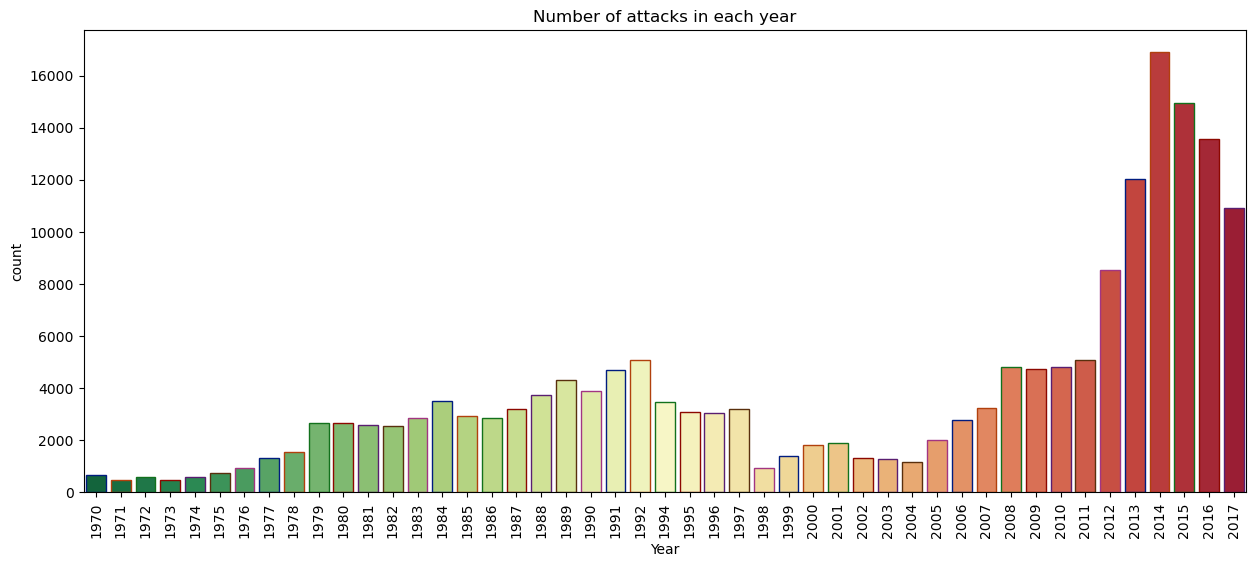

In [24]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number of attacks in each year')
plt.show()

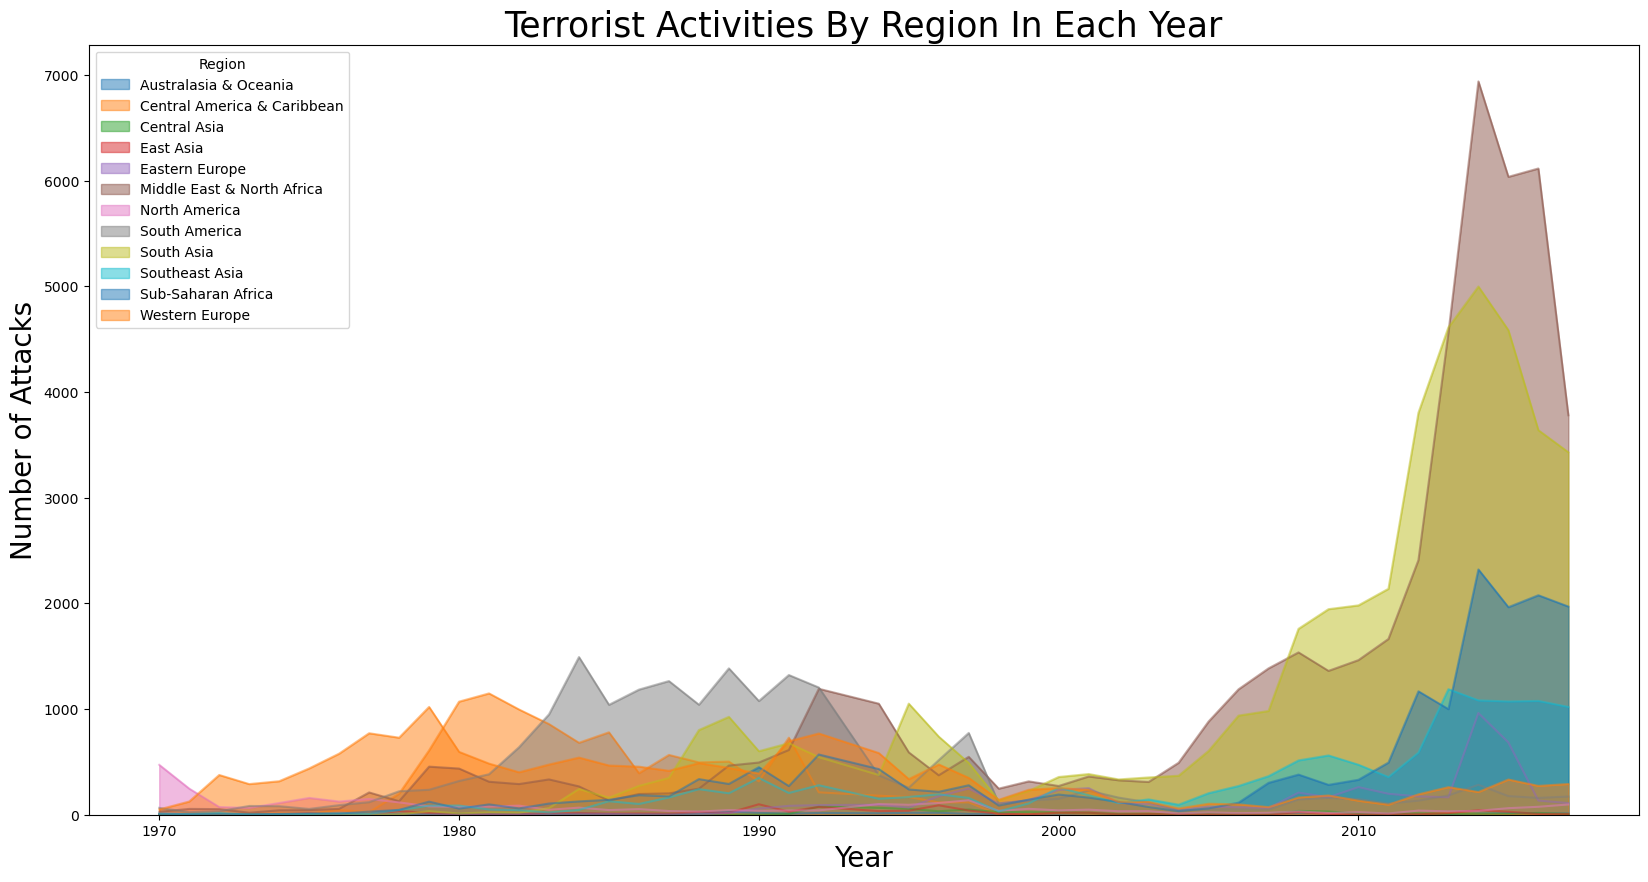

In [25]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [26]:
# countries affected

attack = df.Country.value_counts()[:20]
attack


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

In [27]:
#Top attacking groups
df.Group.value_counts()[1:20]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

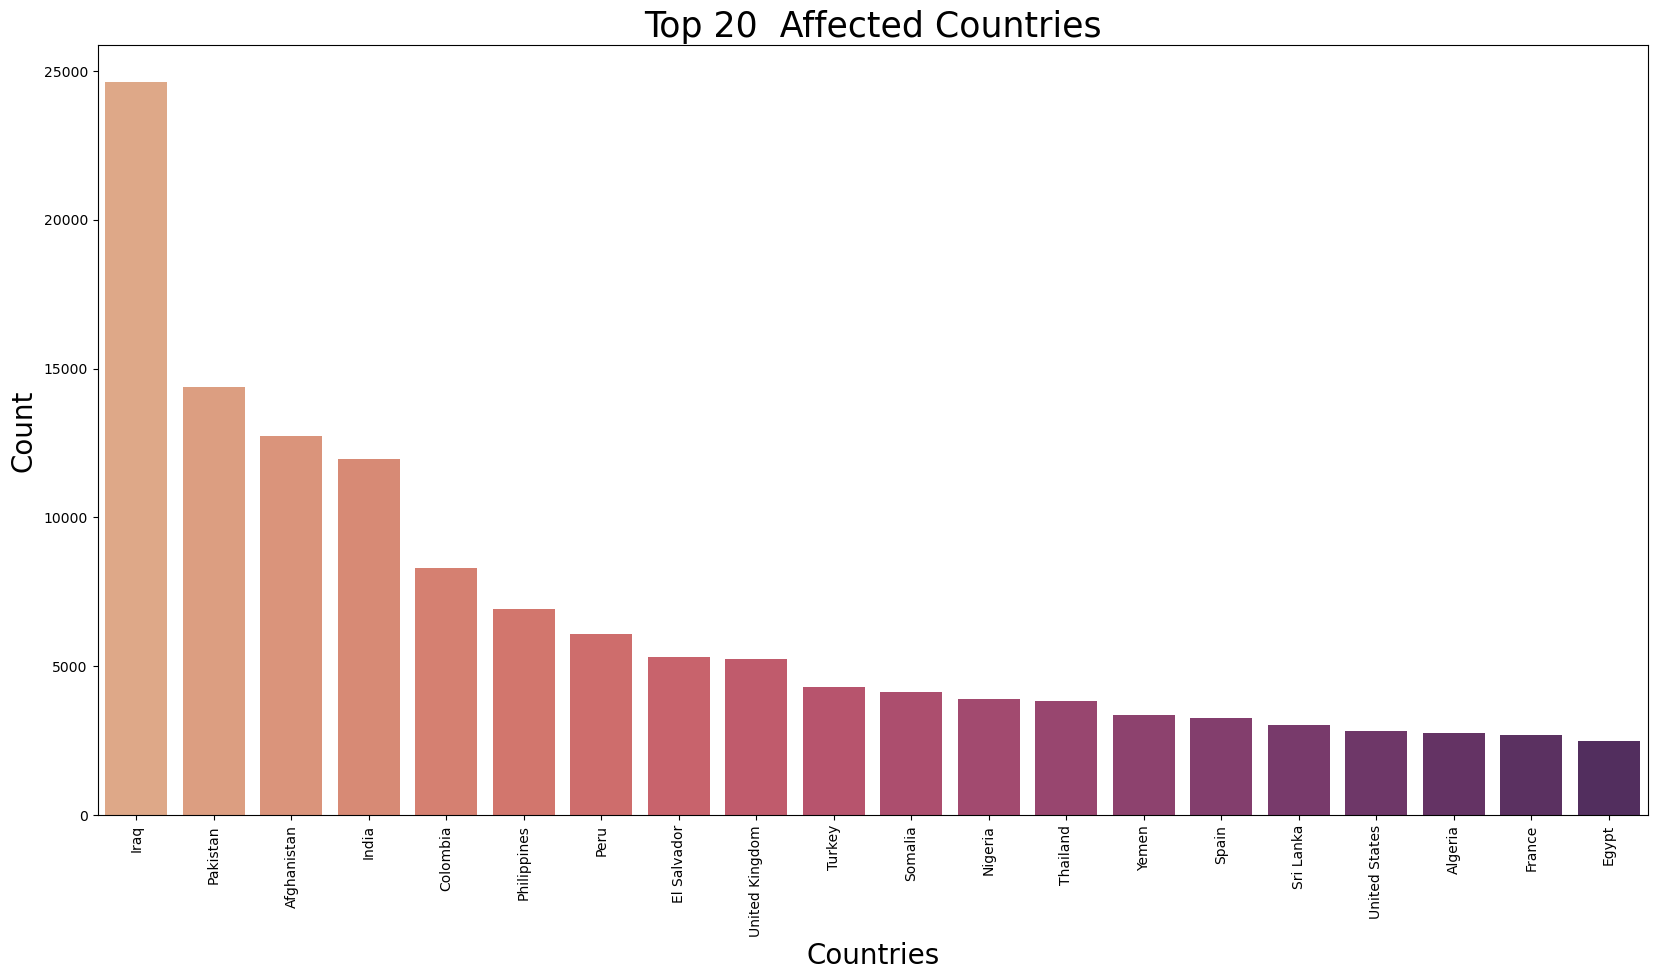

In [46]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:20].index,df['Country'].value_counts()[:20].values,palette="flare")
plt.title('Top 20  Affected Countries',fontsize=25)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation = 90)
plt.show()

In [31]:
city_count=df['City'].value_counts().sort_index()
city_count

62 miles South of Dushanbe     1
A Coruna district             20
A'arbaniyeh                    1
ANkara                         1
Aab Kamra                      1
                              ..
vinchos                        1
wakunai                        1
yacan                          1
yokohama                       1
zinarag                        1
Name: City, Length: 36674, dtype: int64

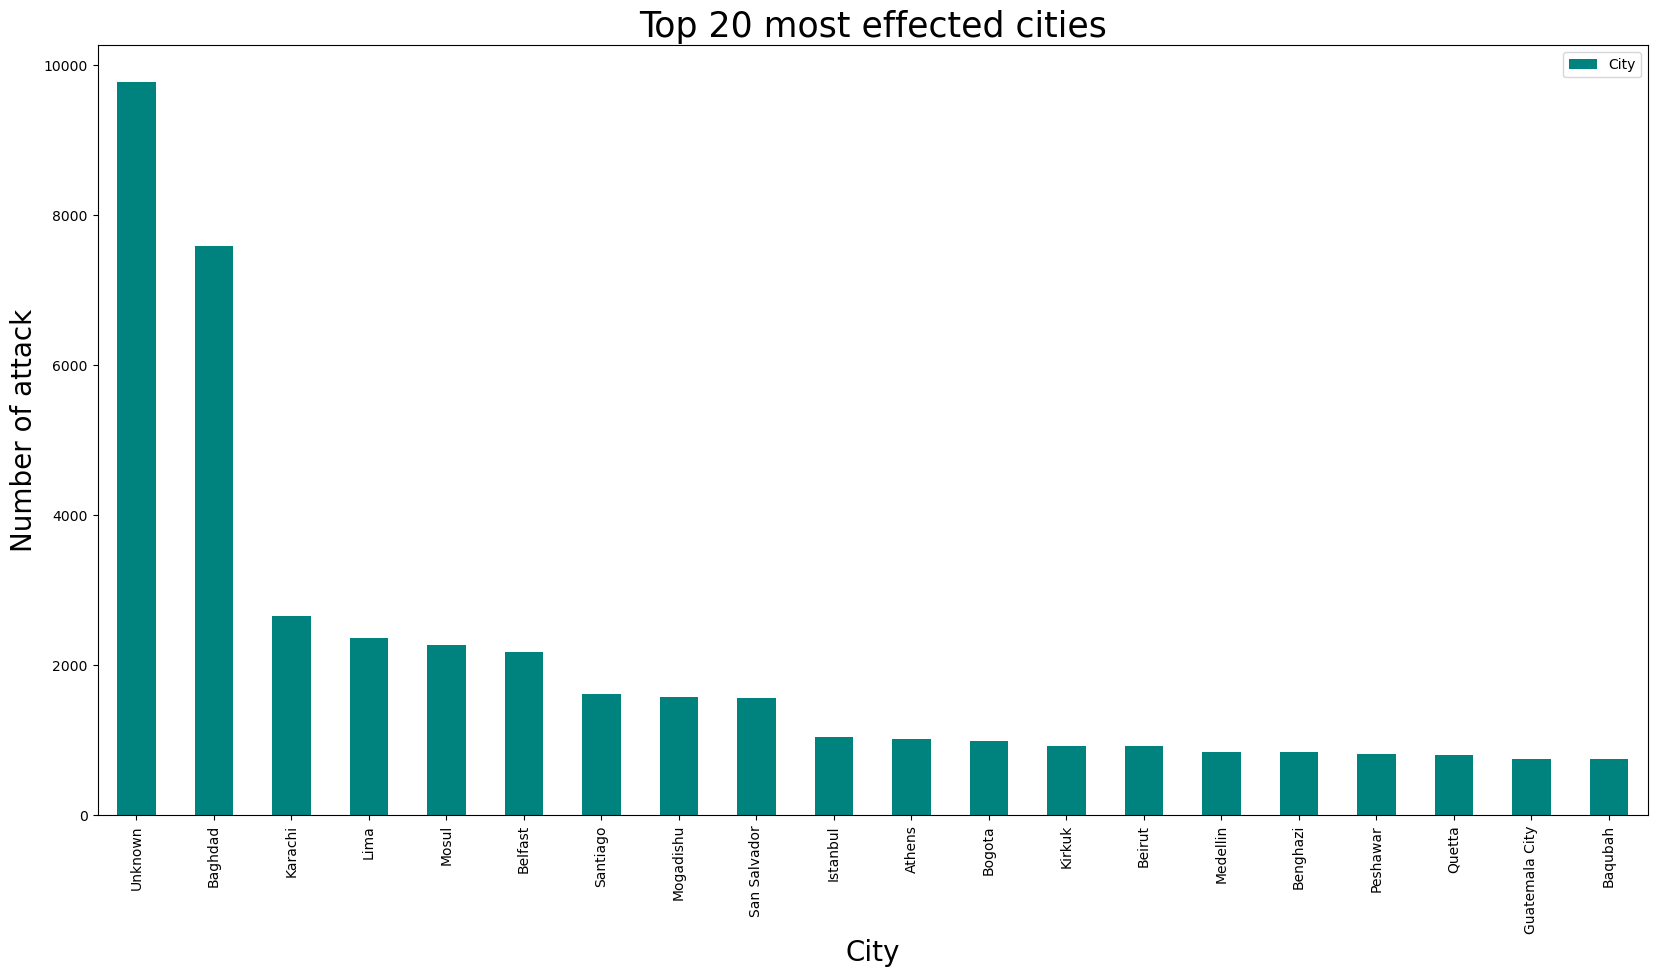

In [47]:
df['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(20).plot(kind='bar',figsize=(20,10),color='#00827f')
plt.xticks(rotation = 90)
plt.xlabel("City",fontsize=20)
plt.ylabel("Number of attack",fontsize=20)
plt.title("Top 20 most effected cities",fontsize=25)
plt.show()

In [33]:
attack_count=df['Attacktype'].value_counts().sort_index()
attack_count

Armed Assault                          42669
Assassination                          19312
Bombing/Explosion                      88255
Facility/Infrastructure Attack         10356
Hijacking                                659
Hostage Taking (Barricade Incident)      991
Hostage Taking (Kidnapping)            11158
Unarmed Assault                         1015
Unknown                                 7276
Name: Attacktype, dtype: int64

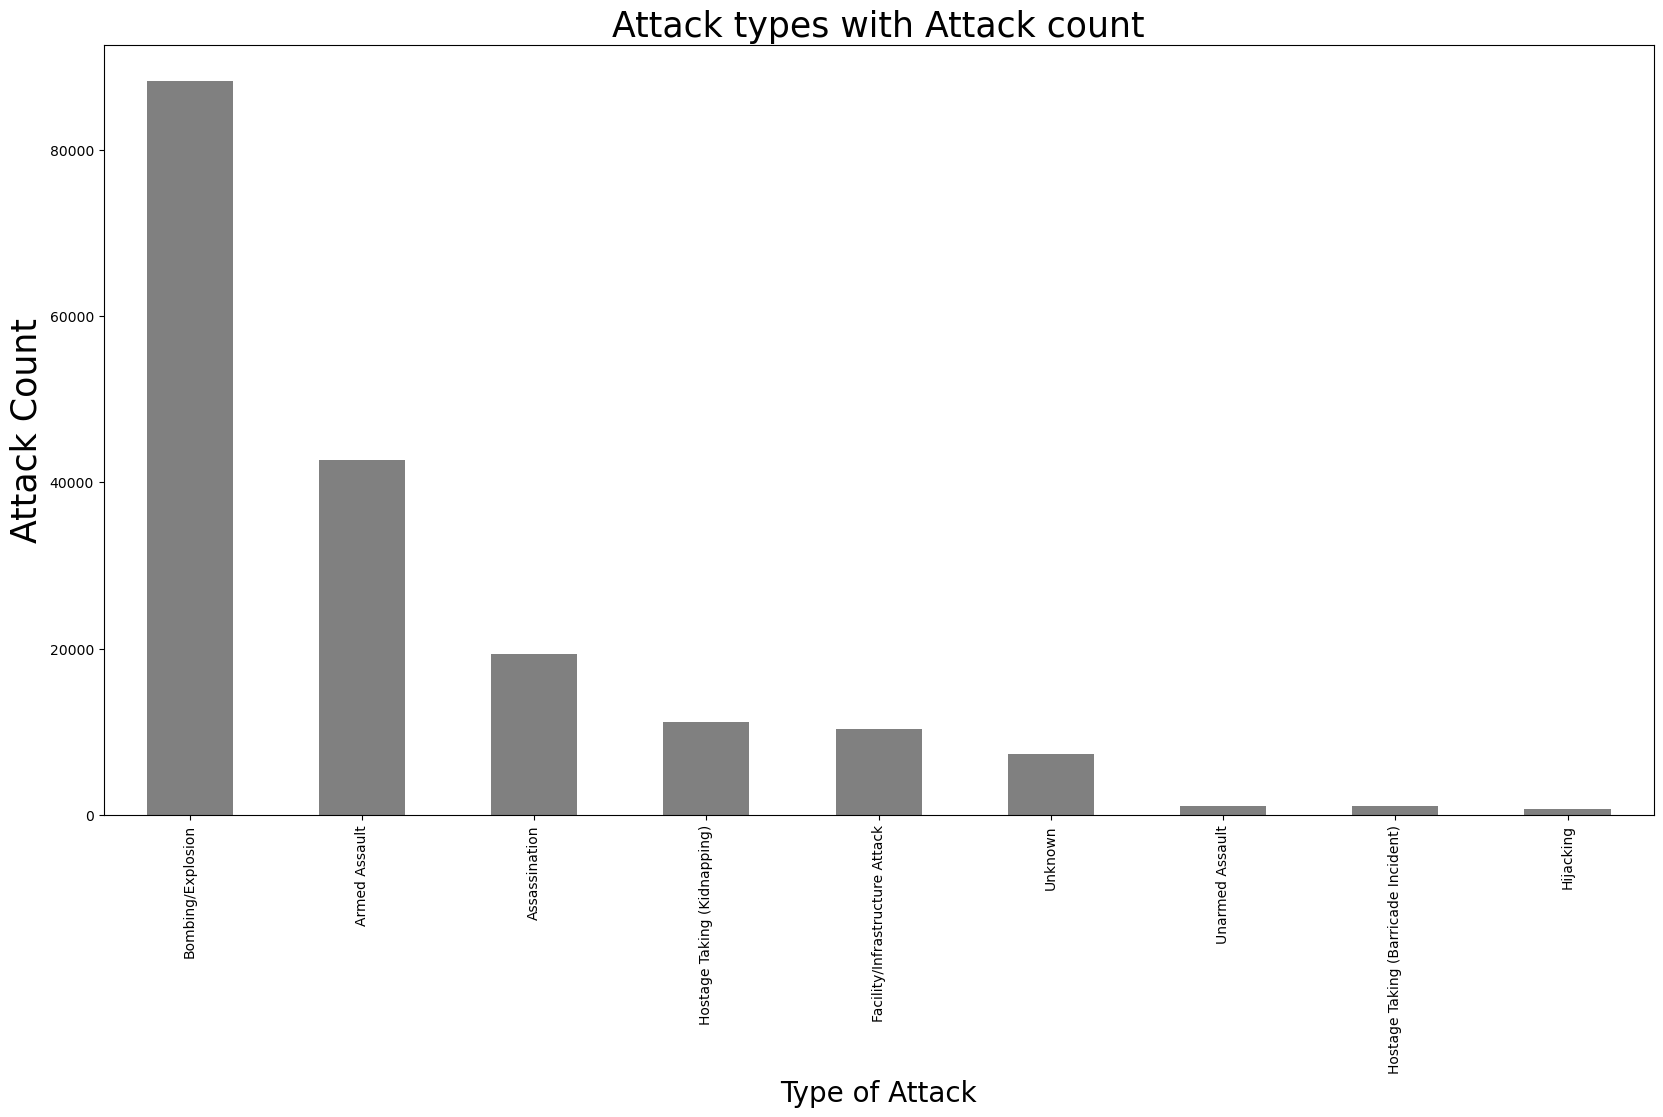

In [34]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='grey')
plt.xticks(rotation = 90)
plt.xlabel("Type of Attack",fontsize=20)
plt.ylabel("Attack Count",fontsize=25)
plt.title("Attack types with Attack count",fontsize=25)
plt.show()

In [36]:
Target_count=df['Targettype'].value_counts().sort_index()
Target_count

Abortion Related                    263
Airports & Aircraft                1343
Business                          20669
Educational Institution            4322
Food or Water Supply                317
Government (Diplomatic)            3573
Government (General)              21283
Journalists & Media                2948
Maritime                            351
Military                          27984
NGO                                 970
Other                               137
Police                            24506
Private Citizens & Property       43511
Religious Figures/Institutions     4440
Telecommunication                  1009
Terrorists/Non-State Militia       3039
Tourists                            440
Transportation                     6799
Unknown                            5898
Utilities                          6023
Violent Political Party            1866
Name: Targettype, dtype: int64

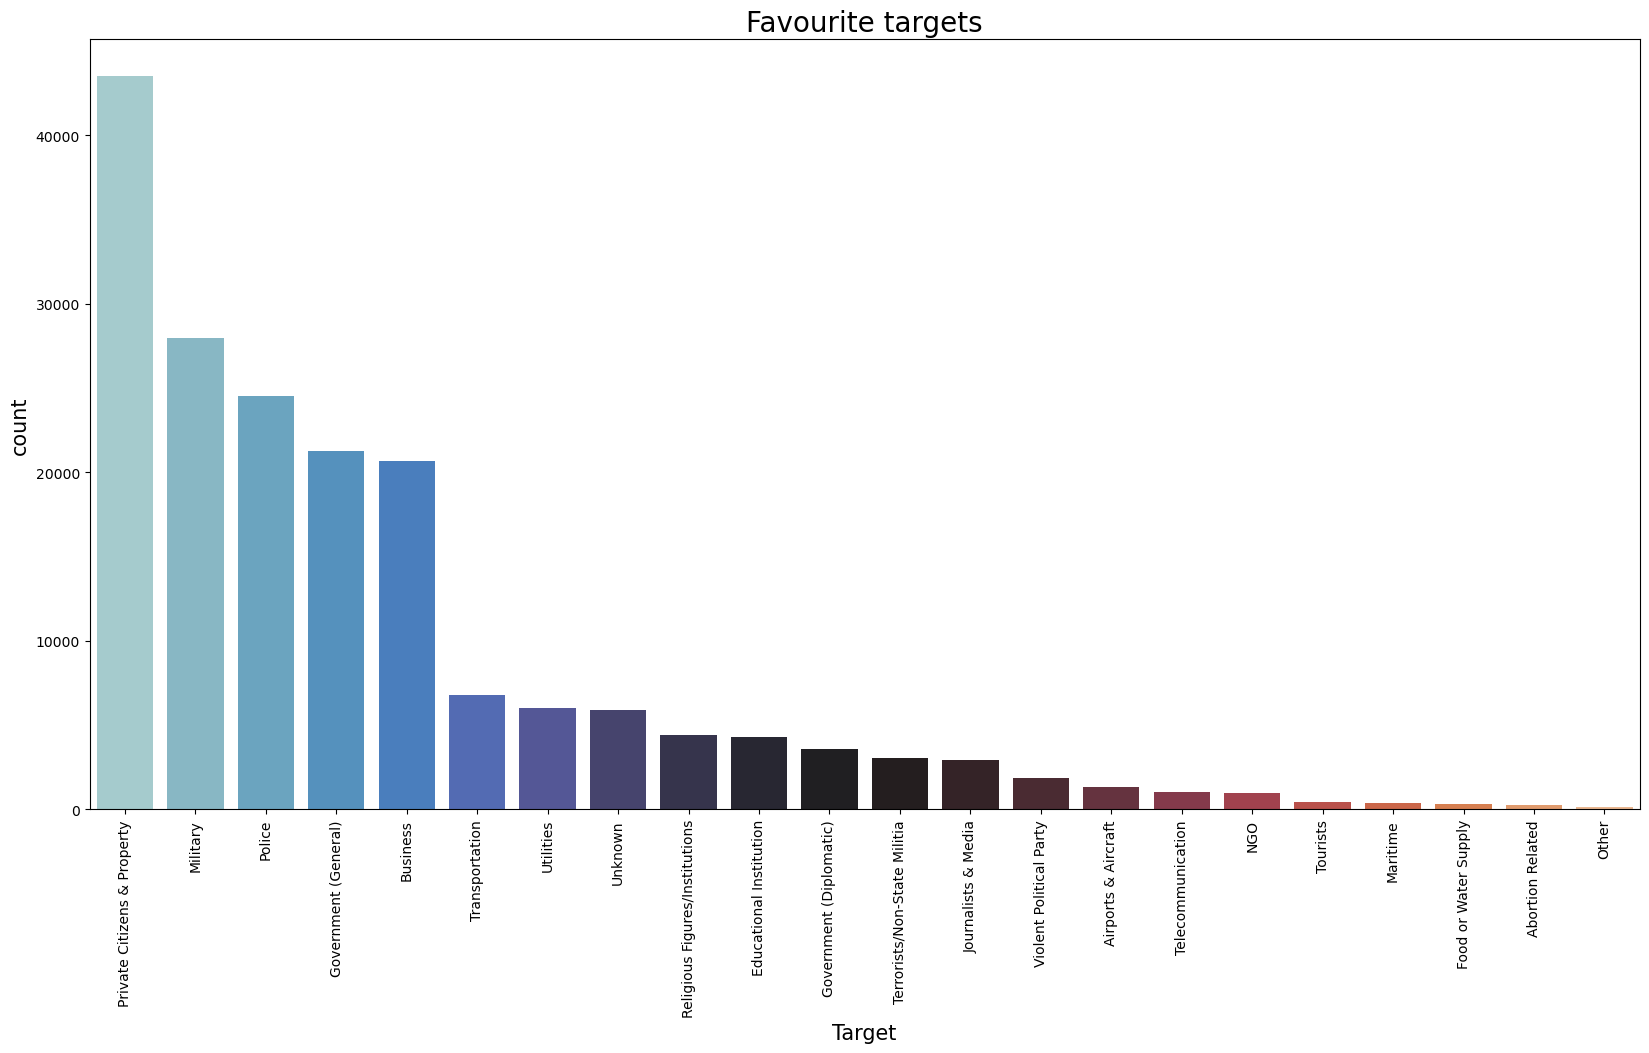

In [37]:
plt.subplots(figsize=(20,10))
sns.countplot(df["Targettype"],order=df['Targettype'].value_counts().index,palette="icefire");
plt.xticks(rotation=90)
plt.xlabel("Target",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Favourite targets",fontsize=20)
plt.show()

In [38]:
group_count=df['Group'].value_counts().sort_index()
group_count

1 May                                    10
14 K Triad                                4
14 March Coalition                        1
14th of December Command                  3
15th of September Liberation Legion       1
                                         ..
Zulu Miners                               1
Zuwar al-Imam Rida                        1
Zviadists                                 1
Zwai Tribe                                1
leftist guerrillas-Bolivarian militia     1
Name: Group, Length: 3537, dtype: int64

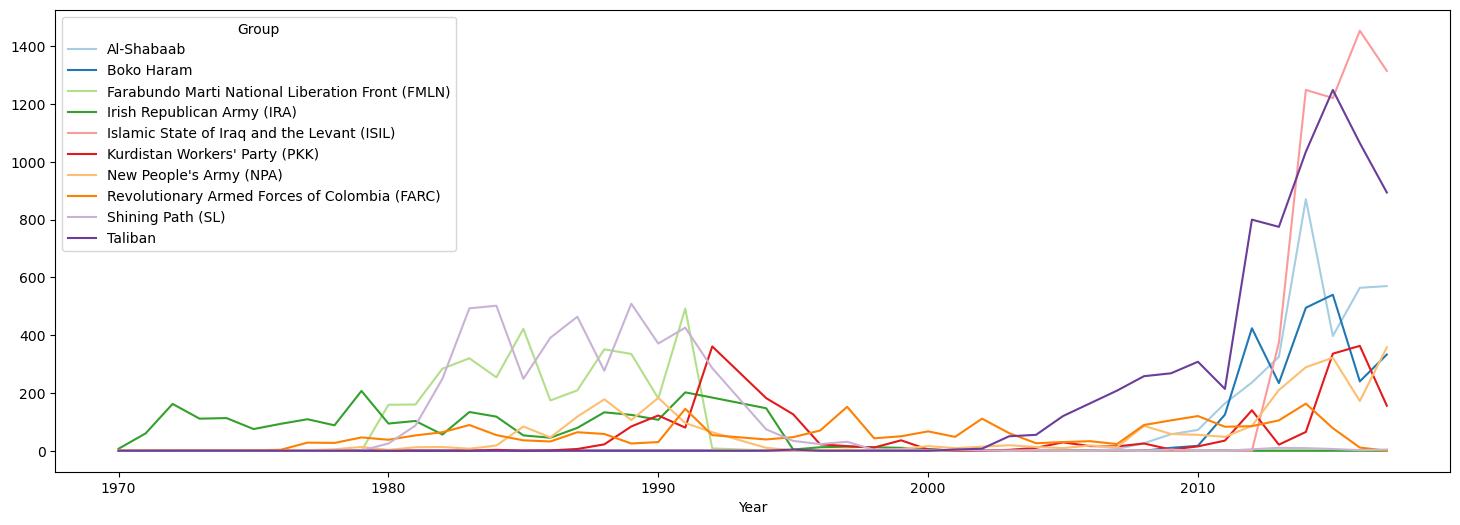

In [39]:
top10_groups = df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top10_groups.Year, top10_groups.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

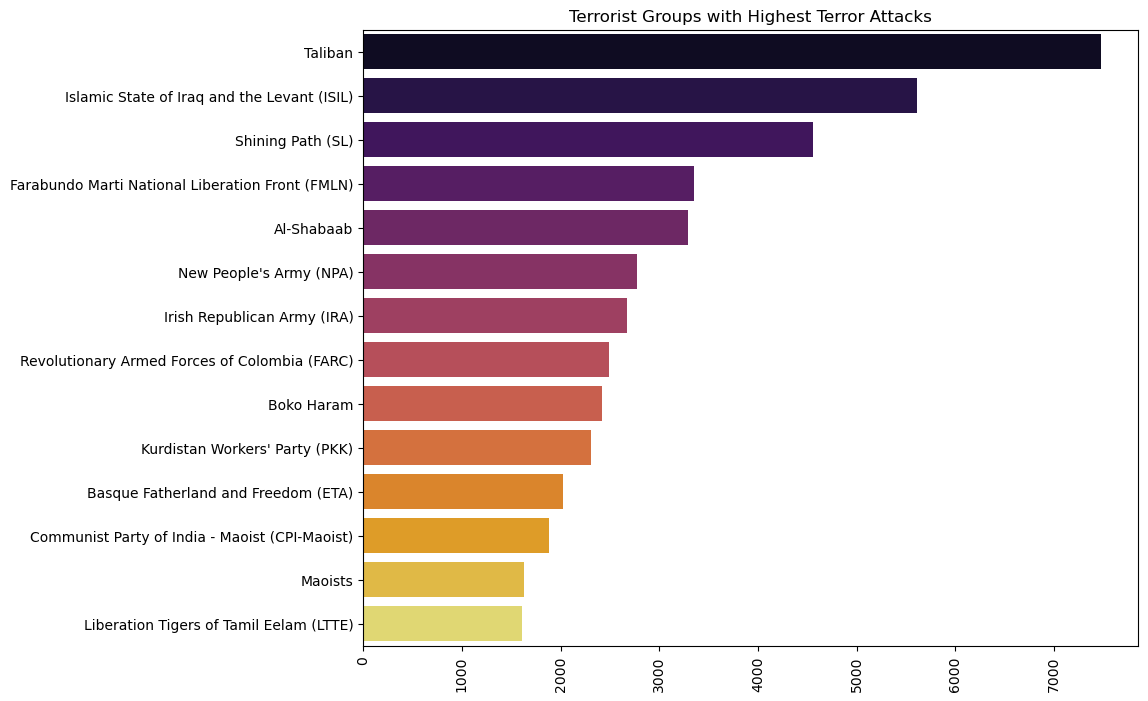

In [40]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

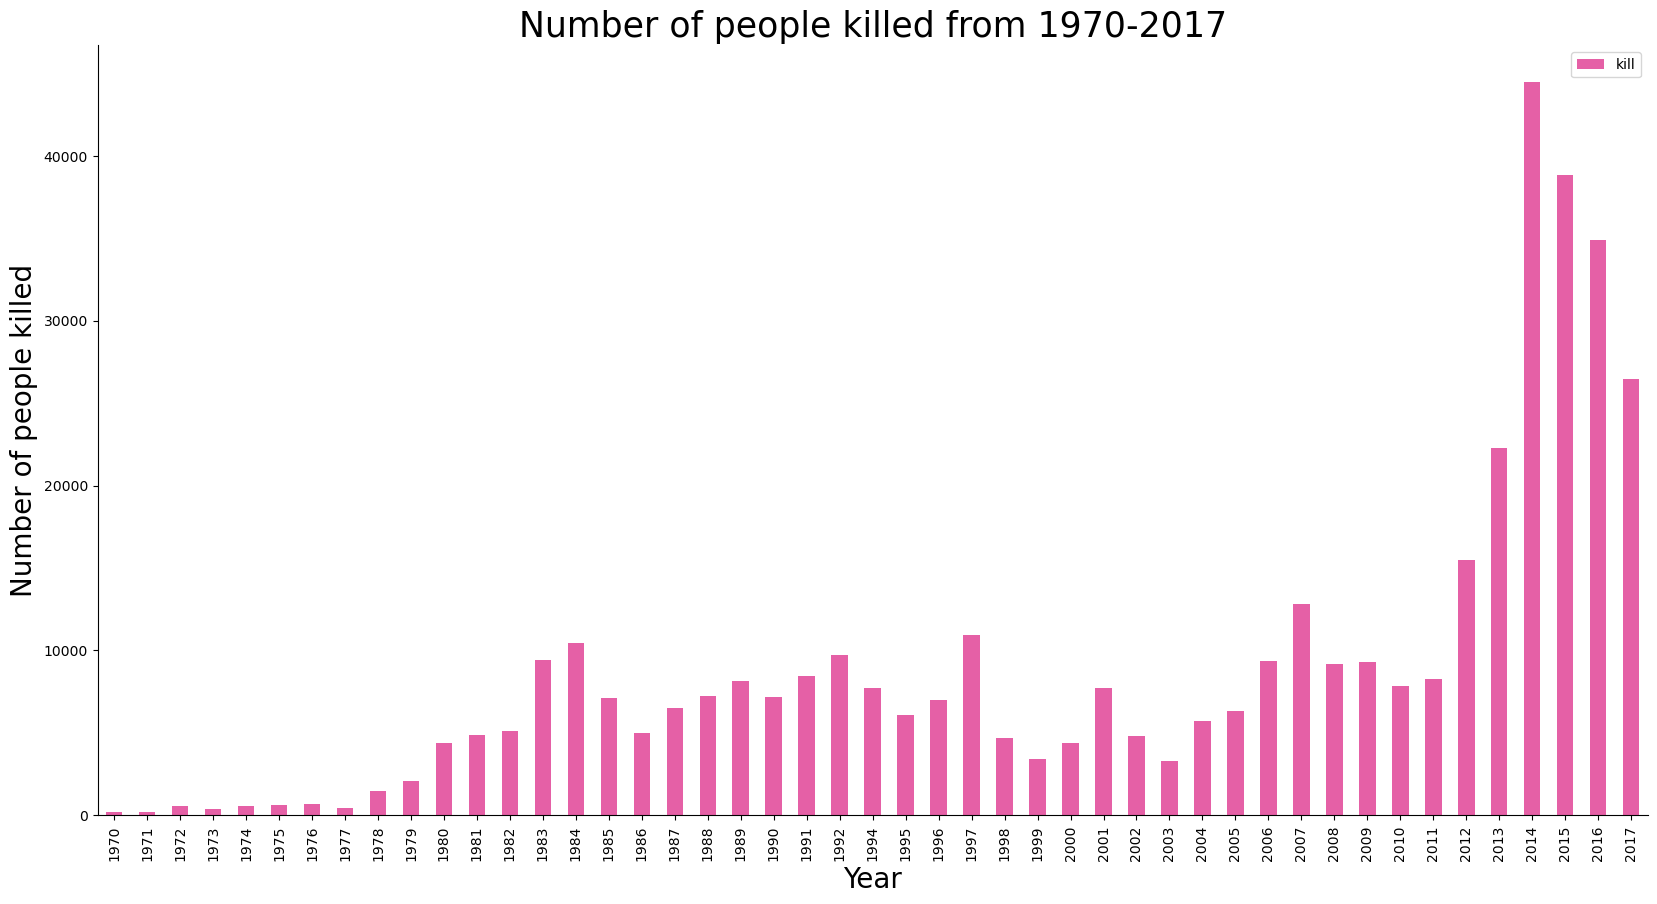

In [48]:
Attacks = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
Attacks.plot(kind='bar',alpha=0.7,ax=ax4,color='#da1d81')
plt.xticks(rotation = 90)
plt.title("Number of people killed from 1970-2017",fontsize=25)
plt.ylabel("Number of people killed",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

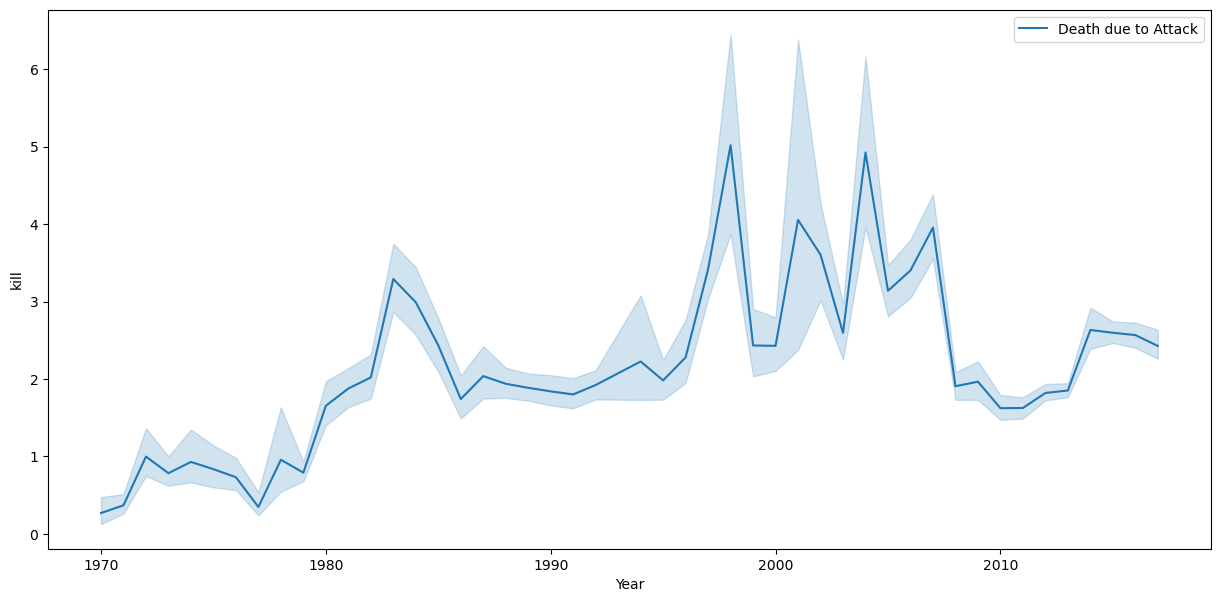

In [64]:
plt.figure(figsize = (15,7))
sns.lineplot('Year','kill',data=df,label="Death due to Attack")
plt.show()

In [62]:
kill=df.loc[:,'kill']
print('Total number of people killed by terror attacks:',int(sum(kill.dropna())))

Total number of people killed by terror attacks: 411868


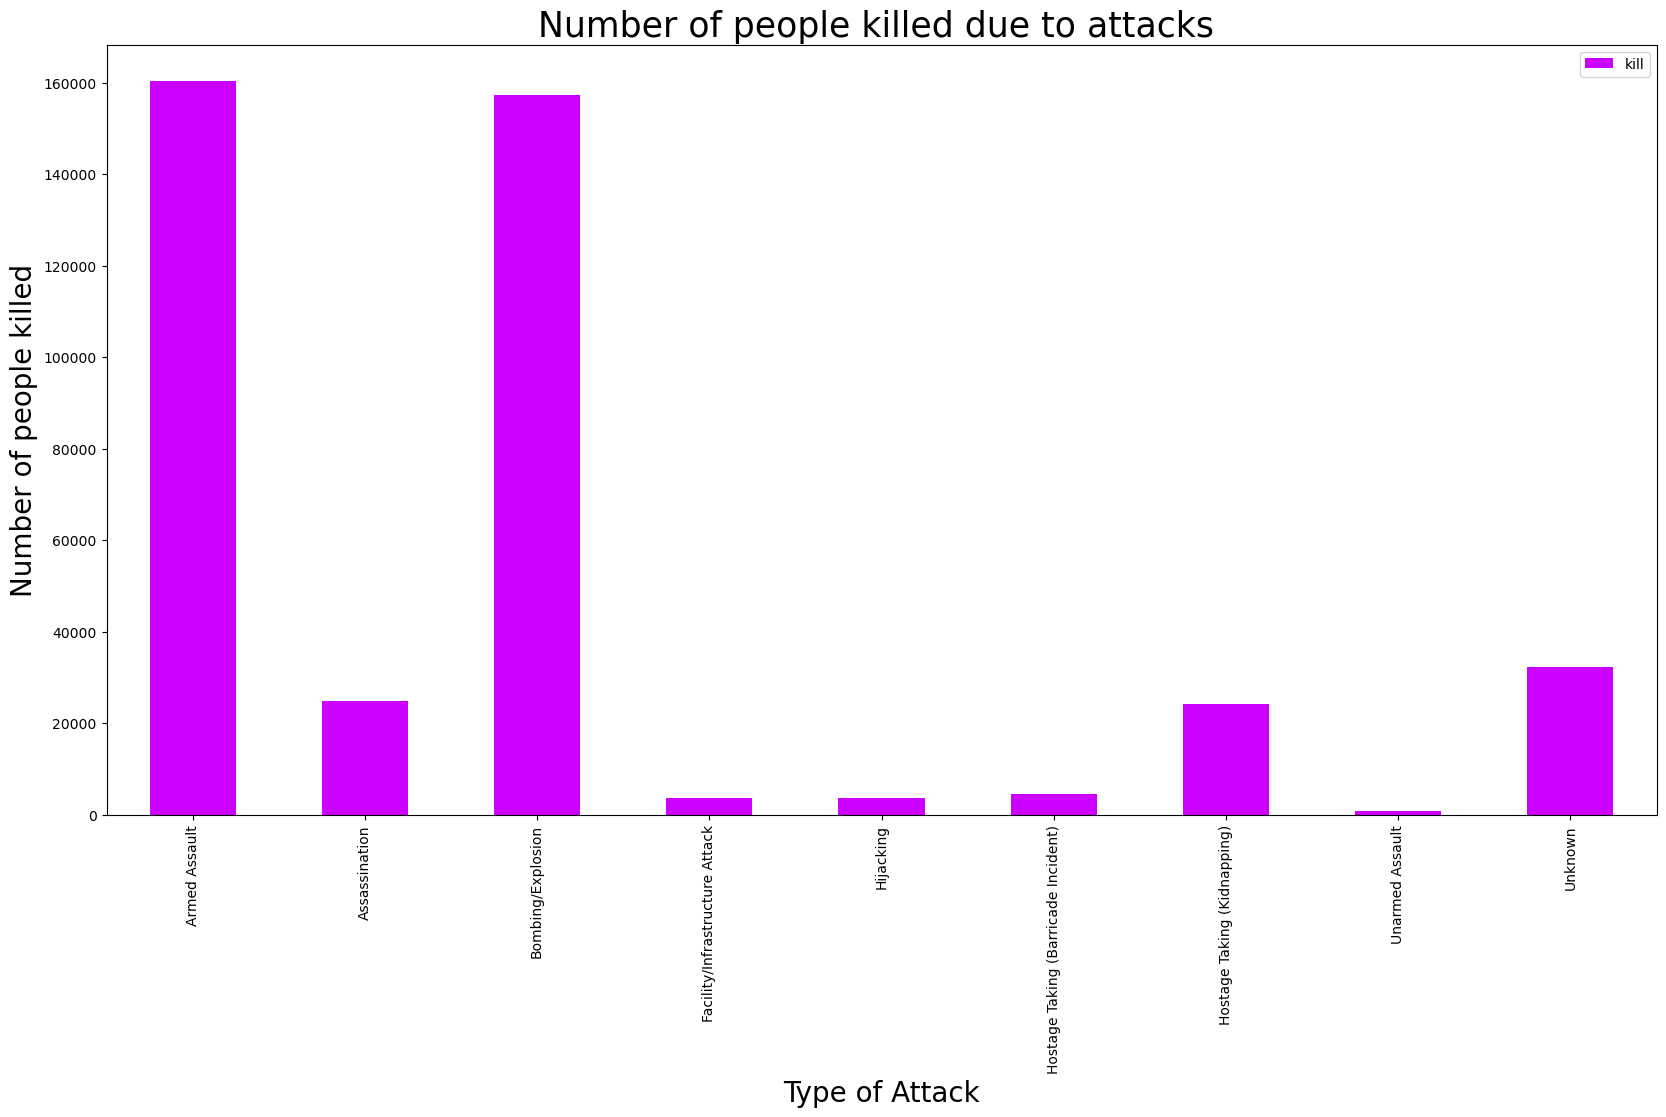

In [65]:
df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['#cc00ff'])
plt.xticks(rotation=90)
plt.title("Number of people killed due to attacks ",fontsize=25)
plt.ylabel('Number of people killed',fontsize=20)
plt.xlabel('Type of Attack',fontsize=20)
plt.show()

In [41]:
# Number of people killed by terror attack as per country and groups

df1 = df[['Group','Country','kill']]
df1 = df1.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df1

Group      Country     kill
0       Islamic State of Iraq and the Levant (ISIL)         Iraq  31058.0
1                                           Taliban  Afghanistan  29269.0
2                                        Boko Haram      Nigeria  16917.0
3                                 Shining Path (SL)         Peru  11595.0
4           Liberation Tigers of Tamil Eelam (LTTE)    Sri Lanka  10928.0
5                                        Al-Shabaab      Somalia   8176.0
6  Farabundo Marti National Liberation Front (FMLN)  El Salvador   8019.0
7       Islamic State of Iraq and the Levant (ISIL)        Syria   6883.0
8                 Nicaraguan Democratic Force (FDN)    Nicaragua   6630.0
9                   Tehrik-i-Taliban Pakistan (TTP)     Pakistan   6014.0

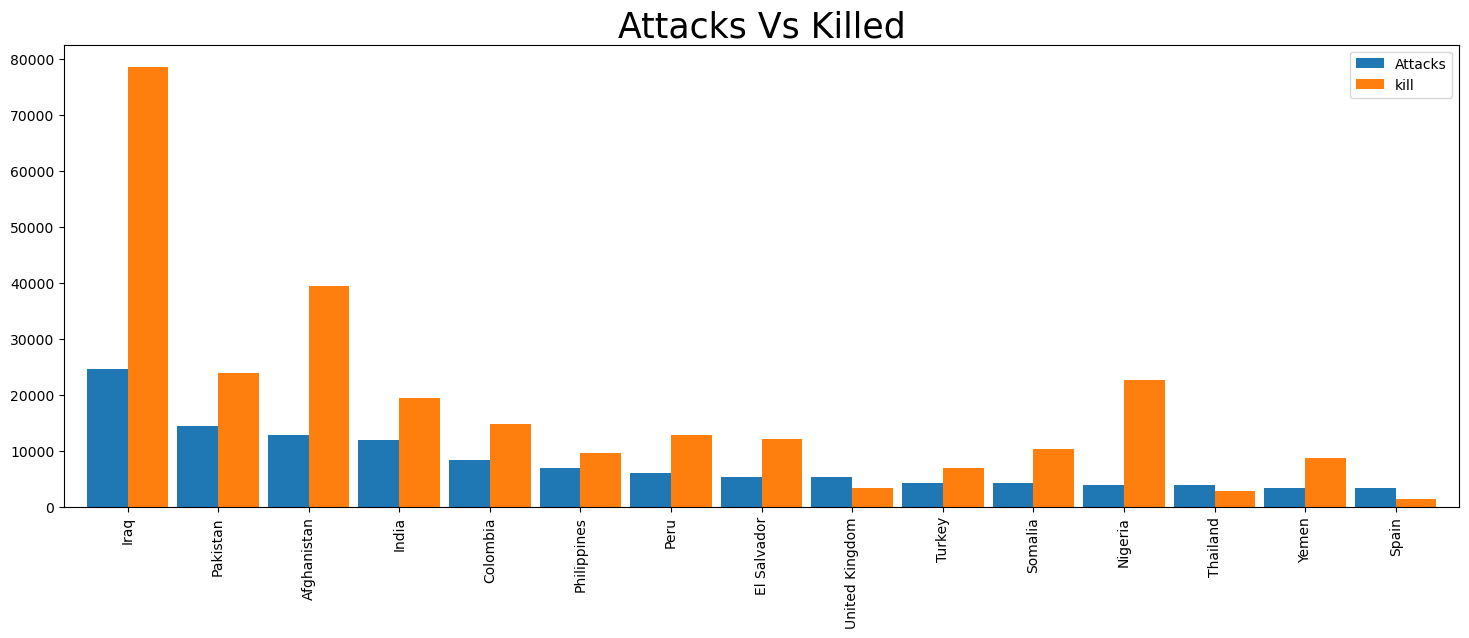

In [82]:
# Attacks Vs Killed

count_terror = df['Country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=df.groupby('Country')['kill'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Attacks Vs Killed",fontsize=25)
plt.show()

In [44]:
df2 = df[['Attacktype','Targettype','Casualities']]
df2= df2.groupby(['Attacktype','Targettype'],axis=0).sum().sort_values('Casualities',ascending=False).drop('Unknown').reset_index().head(10)
df2

Attacktype                      Targettype  Casualities
0  Bombing/Explosion     Private Citizens & Property     176326.0
1      Armed Assault     Private Citizens & Property      79868.0
2  Bombing/Explosion                        Military      78313.0
3      Armed Assault                        Military      70983.0
4  Bombing/Explosion                          Police      63311.0
5  Bombing/Explosion                        Business      59076.0
6  Bombing/Explosion            Government (General)      37202.0
7  Bombing/Explosion                  Transportation      37189.0
8      Armed Assault                          Police      36839.0
9  Bombing/Explosion  Religious Figures/Institutions      29623.0

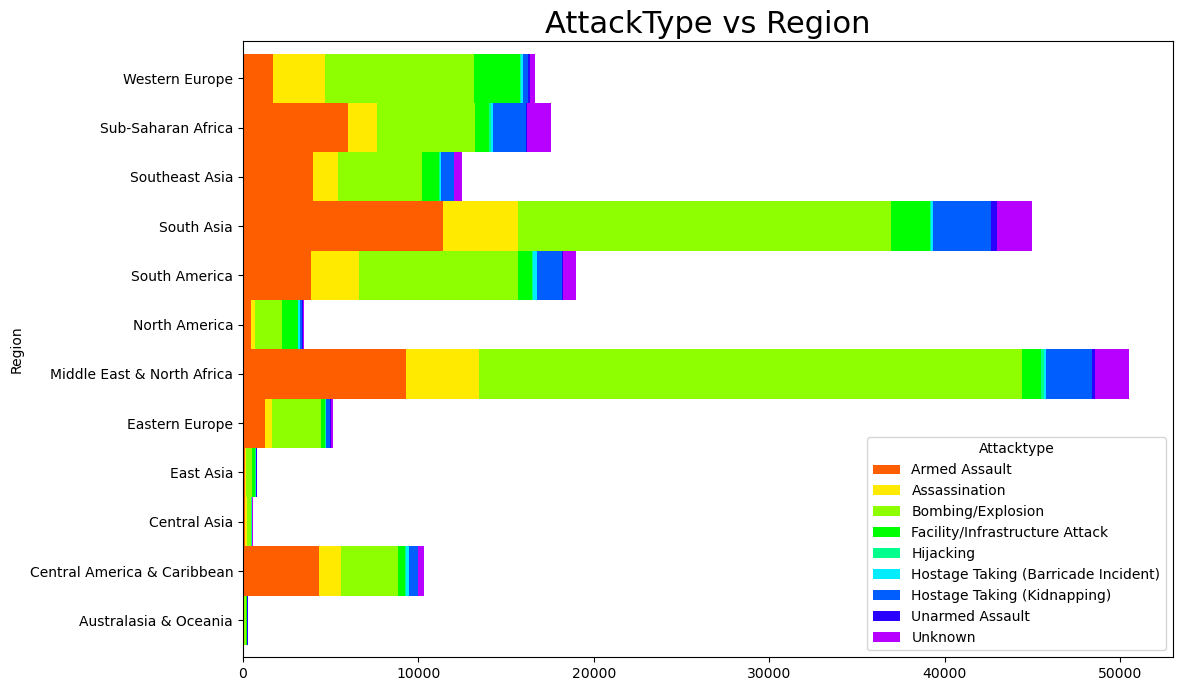

In [84]:
pd.crosstab(df.Region,df.Attacktype).plot.barh(stacked=True,width=1,color=sns.color_palette('gist_rainbow',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title("AttackType vs Region",fontsize=22)
plt.show()

In [49]:
# Main Weapons:Explosives
from pandas import DataFrame
weapons = df['Weapon'].value_counts()
weapons = DataFrame(weapons)
weapons.reset_index(level=0, inplace=True)
weapons.columns = ['Weapon used', 'Weapon Count']
weapons

Weapon used  Weapon Count
0                                          Explosives         92426
1                                            Firearms         58524
2                                             Unknown         15157
3                                          Incendiary         11135
4                                               Melee          3655
5                                            Chemical           321
6                                  Sabotage Equipment           141
7   Vehicle (not to include vehicle-borne explosiv...           136
8                                               Other           114
9                                          Biological            35
10                                       Fake Weapons            33
11                                       Radiological            14

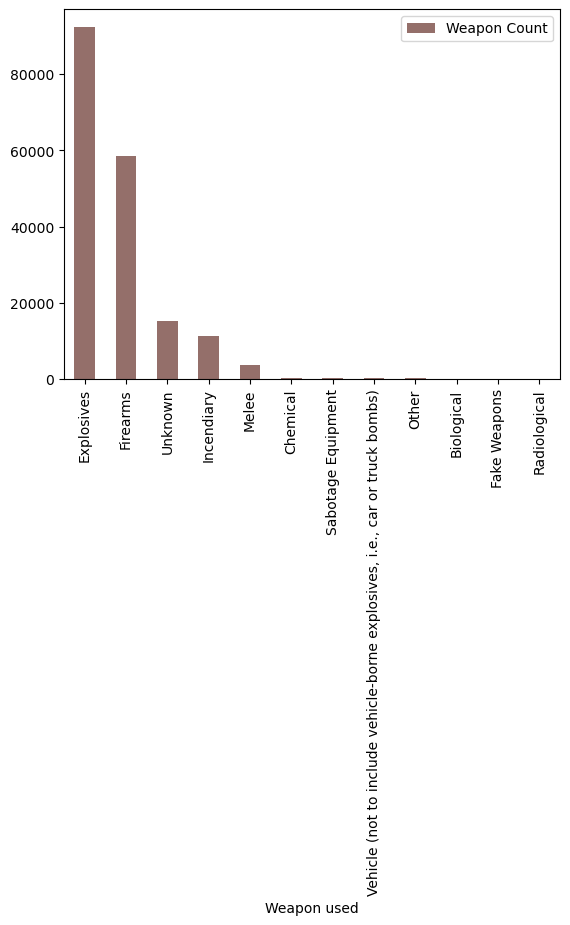

In [50]:
weapons.plot.bar(x='Weapon used', y='Weapon Count', rot=90, color = '#946f6a');

In [51]:
subweapons = df['WeaponSubType'].value_counts()
subweapons = DataFrame(subweapons)

subweapons.reset_index(level=0, inplace=True)
subweapons.columns = ['Weapon Sub Type Used', 'Weapon Count']
subweapons

Weapon Sub Type Used  Weapon Count
0                      Unknown Explosive Type         44980
1                            Unknown Gun Type         33137
2           Automatic or Semi-Automatic Rifle         17412
3                                     Vehicle          9900
4   Projectile (rockets, mortars, RPGs, etc.)          9848
5                        Other Explosive Type          7304
6                                     Handgun          6704
7                                     Grenade          5167
8                                    Landmine          4251
9                                  Arson/Fire          4141
10    Suicide (carried bodily by human being)          3245
11                             Remote Trigger          2719
12                Knife or Other Sharp Object          2585
13                                Sticky Bomb          1594
14               Molotov Cocktail/Petrol Bomb          1239
15                               Dynamite/TNT          1222
16              Rifle/Shotgun (non-automatic)          1175
17                        Gasoline or Alcohol           844
18                                  Time Fuse           792
19                                  Pipe Bomb           625
20                               Blunt Object           587
21                                Letter Bomb           548
22                         Hands, Feet, Fists           231
23                           Pressure Trigger           219
24                        Unknown Weapon Type           107
25            Rope or Other Strangling Device           103
26                             Other Gun Type            86
27                                  Poisoning            83
28                                  Explosive            65
29                                Suffocation            10

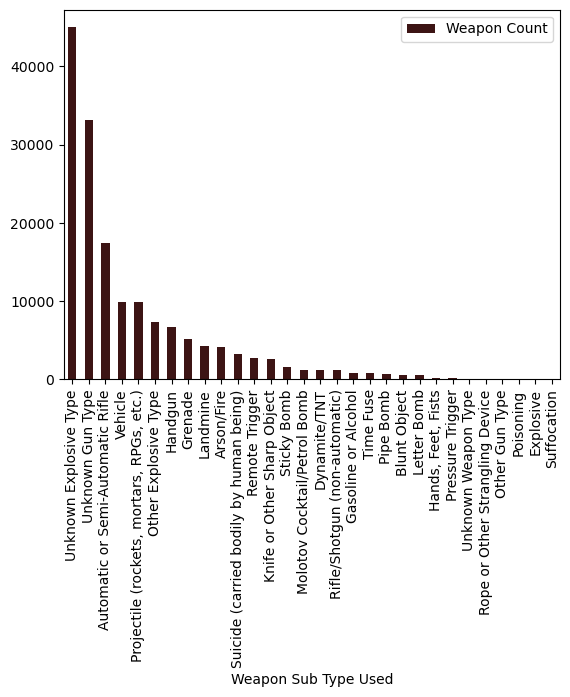

In [52]:
subweapons = subweapons.plot.bar(x='Weapon Sub Type Used', y='Weapon Count', rot=90, color = '#3c1414')

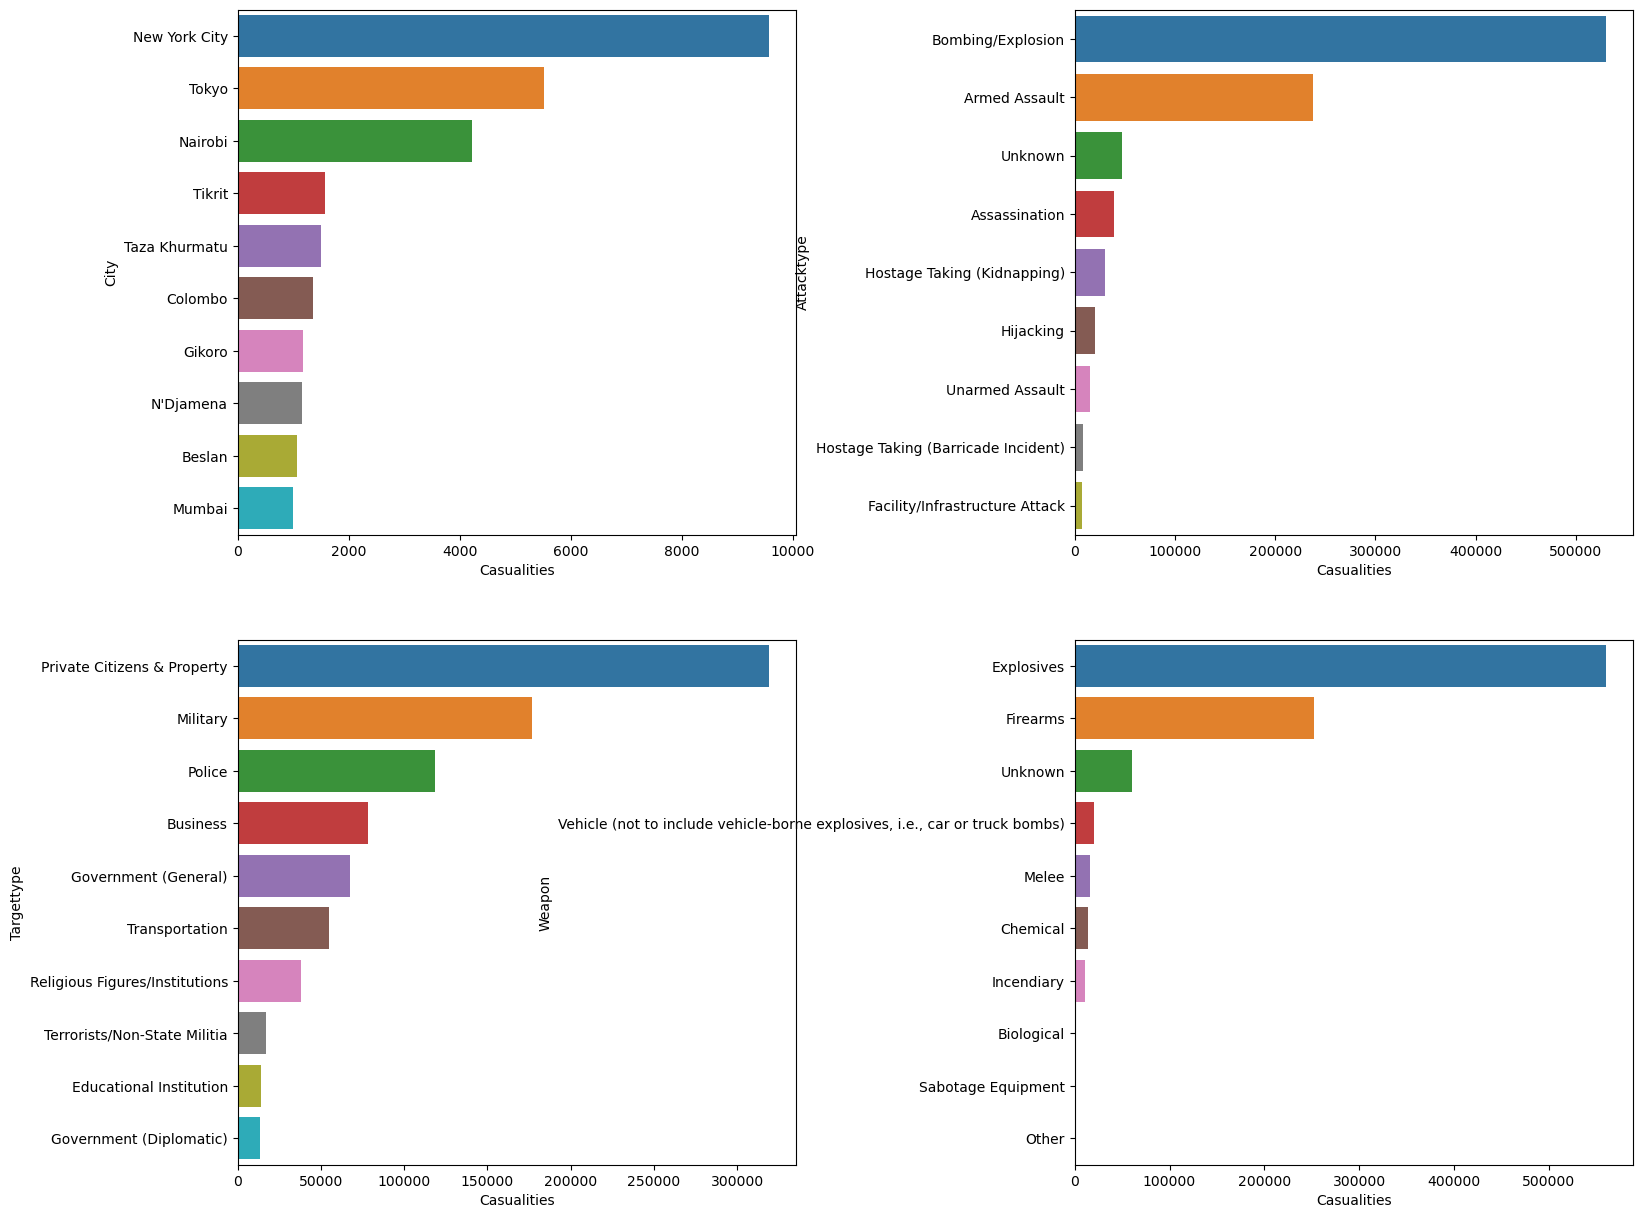

In [53]:
Top_cities = df.groupby('City')['Casualities'].max().sort_values(ascending = False).reset_index().head(10)
Top_attackType = df.groupby('Attacktype')['Casualities'].sum().sort_values(ascending = False).reset_index().head(10)
Top_Target_type = df.groupby('Targettype')['Casualities'].sum().sort_values(ascending = False).reset_index().head(10)
Top_Weapon_type = df.groupby('Weapon')['Casualities'].sum().sort_values(ascending = False).reset_index().head(10)

plt.figure(figsize=(18,15))

plt.subplots_adjust(wspace = .5)
plt.subplot(2,2,1)
sns.barplot(x='Casualities', y='City', data = Top_cities)

plt.subplot(2,2,2)
sns.barplot(x='Casualities', y='Attacktype' , data = Top_attackType)

plt.subplot(2,2,3)
sns.barplot(x='Casualities', y= 'Targettype', data = Top_Target_type)

plt.subplot(2,2,4)
sns.barplot(x='Casualities', y= 'Weapon', data = Top_Weapon_type)
plt.show()

In [54]:
countryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
kill         39384.0     42.0  11066.0      0.0  3043.0                  0.0   

Country  Argentina  Armenia  Australia  Austria  ...  Vietnam  \
kill         490.0     37.0       23.0     30.0  ...      1.0   

Country  Wallis and Futuna  West Bank and Gaza Strip  West Germany (FRG)  \
kill                   0.0                    1500.0                97.0   

Country  Western Sahara   Yemen  Yugoslavia  Zaire  Zambia  Zimbabwe  
kill                1.0  8776.0       119.0  324.0    70.0     154.0  

[1 rows x 205 columns]

In [55]:
typekill=df.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typekill

Attacktype  Armed Assault  Assassination  Bombing/Explosion  \
kill             160297.0        24920.0           157321.0   

Attacktype  Facility/Infrastructure Attack  Hijacking  \
kill                                3642.0     3718.0   

Attacktype  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
kill                                     4478.0                      24231.0   

Attacktype  Unarmed Assault  Unknown  
kill                  880.0  32381.0

In [56]:
targettype=df.pivot_table(columns='Targettype', values='kill', aggfunc='sum')
targettype

Targettype  Abortion Related  Airports & Aircraft  Business  \
kill                    10.0               3767.0   23487.0   

Targettype  Educational Institution  Food or Water Supply  \
kill                         3745.0                 313.0   

Targettype  Government (Diplomatic)  Government (General)  \
kill                         3039.0               26071.0   

Targettype  Journalists & Media  Maritime  Military  ...   Police  \
kill                     1501.0    1191.0  106047.0  ...  53704.0   

Targettype  Private Citizens & Property  Religious Figures/Institutions  \
kill                           140504.0                         13413.0   

Targettype  Telecommunication  Terrorists/Non-State Militia  Tourists  \
kill                    182.0                        9088.0     758.0   

Targettype  Transportation  Unknown  Utilities  Violent Political Party  
kill               13916.0   4329.0     1874.0                   3617.0  

[1 rows x 22 columns]

In [57]:
pd.crosstab(df['Country'],df['Attacktype'],margins=True).reset_index().head(10)

Attacktype              Country  Armed Assault  Assassination  \
0                   Afghanistan           2877            954   
1                       Albania             11             14   
2                       Algeria            913            431   
3                       Andorra              1              0   
4                        Angola            124             28   
5           Antigua and Barbuda              0              0   
6                     Argentina             88            137   
7                       Armenia              4              6   
8                     Australia             14             10   
9                       Austria             11             14   

Attacktype  Bombing/Explosion  Facility/Infrastructure Attack  Hijacking  \
0                        6245                             355         16   
1                          48                               1          0   
2                        1088                              53          9   
3                           0                               0          0   
4                         256                              19          0   
5                           0                               1          0   
6                         453                              39          1   
7                          10                               1          1   
8                          39                              38          0   
9                          54                              26          2   

Attacktype  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
0                                            27                         1011   
1                                             0                            2   
2                                             4                           97   
3                                             0                            0   
4                                             1                           28   
5                                             0                            0   
6                                             5                           72   
7                                             1                            1   
8                                             3                            0   
9                                             1                            2   

Attacktype  Unarmed Assault  Unknown    All  
0                        73     1173  12731  
1                         2        2     80  
2                         1      147   2743  
3                         0        0      1  
4                         1       42    499  
5                         0        0      1  
6                         7       13    815  
7                         0        0     24  
8                         4        6    114  
9                         2        3    115

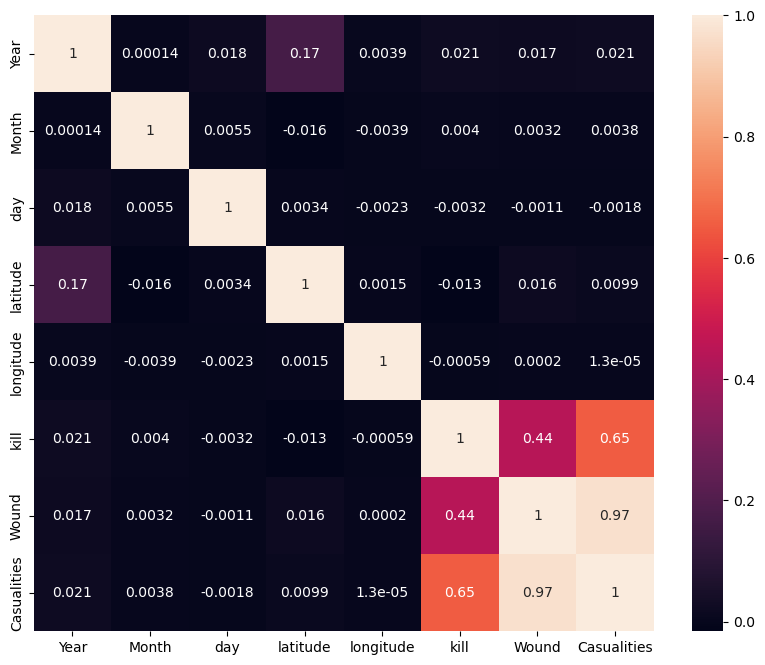

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Conclusion

In [59]:
print('The region of',df['Region'].value_counts(dropna=True, normalize=False, ascending=False).index[0] , 'had the highest no of attacks of ',df['Region'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

print('Country with most terror attacks was' ,df['Country'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'with total no of attacks',df['Country'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

print(df['City'].value_counts(dropna=True, normalize=False, ascending=False).index[0] , 'and Unnamed Cities with total no of attacks',df['City'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')
print('City that had most attacks is' ,df['City'].value_counts(dropna=True, normalize=False, ascending=False).index[1])
print(' ')

print('Group responsible for most attacks is', df['Group'].value_counts(dropna=True, normalize=False, ascending=False).index[1],'with total no of attacks',df['Group'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

print('Year with most attacks', df['Year'].value_counts(dropna=True, normalize=False, ascending=False).index[1],'with total no of attacks',df['Year'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

print('The most used weapon in terror attacks was' ,df['Weapon'].value_counts(dropna=True, normalize=False, ascending=False).index[0])
print(' ')

print('The most preferred method of attack was',df['Attacktype'].value_counts(dropna=True, normalize=False, ascending=False).index[0])
print(' ')
t = df['Targettype'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('The main targets of terrorists were',df['Targettype'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalling at',t[0])

print('while the second was',df['Targettype'].value_counts(dropna=True, normalize=False, ascending=False).index[1],'at',t[1])

The region of Middle East & North Africa had the highest no of attacks of  50474
 
Country with most terror attacks was Iraq with total no of attacks 24636
 
Unknown and Unnamed Cities with total no of attacks 9775
 
City that had most attacks is Baghdad
 
Group responsible for most attacks is Taliban with total no of attacks 82782
 
Year with most attacks 2015 with total no of attacks 16903
 
The most used weapon in terror attacks was Explosives
 
The most preferred method of attack was Bombing/Explosion
 
The main targets of terrorists were Private Citizens & Property totalling at 23.9%
while the second was Military at 15.4%
